In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


#  Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures

# Read Data

In [3]:
train_data=pd.read_csv('../input/spaceship-titanic/train.csv')
test_data=pd.read_csv('../input/spaceship-titanic/test.csv')

# Show 5 frist row data

In [4]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Describe Data

In [5]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# Data Info

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Data corr

In [7]:
train_data.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


# Display Data corr

<AxesSubplot:>

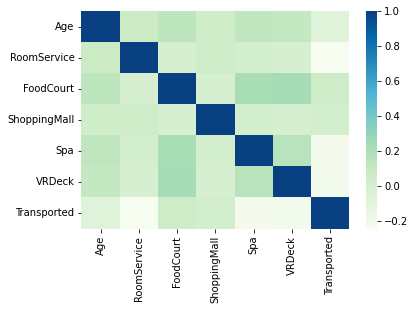

In [8]:
sns.heatmap(train_data.corr(),cmap='GnBu')  

# Show data contain null data

In [9]:
data=pd.DataFrame(train_data.isnull().sum(),columns=['Number of null'])
data['percentage']=(train_data.isnull().sum())/len(train_data)*100
data

,Number of null,percentage
PassengerId,0,0.000000
HomePlanet,201,2.312205
CryoSleep,217,2.496261
Cabin,199,2.289198
Destination,182,2.093639
Age,179,2.059128
VIP,203,2.335212
RoomService,181,2.082135
FoodCourt,183,2.105142
ShoppingMall,208,2.392730


In [10]:
train_data.drop('Name',axis=1,inplace=True)
train_data.drop('PassengerId',axis=1,inplace=True)
index=test_data['PassengerId']
test_data.drop('Name',axis=1,inplace=True)
test_data.drop('PassengerId',axis=1,inplace=True)
train_data.drop('Destination',axis=1,inplace=True)
test_data.drop('Destination',axis=1,inplace=True)

# Show data contain duplicate data

In [11]:
train_data.duplicated().sum()

26

# Show Transported

<AxesSubplot:xlabel='Transported', ylabel='count'>

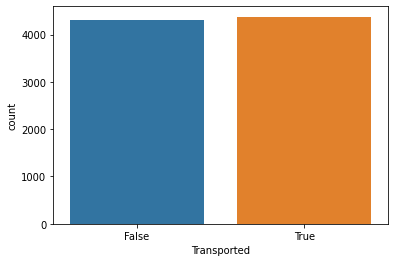

In [12]:
sns.countplot(x='Transported',data=train_data)

# Show input X and output y

In [13]:
X=train_data.iloc[:,:-1]
y=train_data.iloc[:,-1]
X_key=X.keys()

# Show input X

In [14]:
X

,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,Earth,True,G/1499/S,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,Earth,False,G/1500/S,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,Europa,False,E/608/S,32.0,False,0.0,1049.0,0.0,353.0,3235.0


# Show output y

In [15]:
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

# Transform y

In [16]:
label=LabelEncoder()
y=label.fit_transform(y)
pd.DataFrame(y)

,0
0,0
1,1
2,0
3,0
4,1
...,...
8688,0
8689,0
8690,1
8691,0


# Transform X

In [17]:
list=['HomePlanet','CryoSleep','Cabin','VIP']
for col in list:
    X[col]=label.fit_transform(X[col])
    test_data[col]=label.fit_transform(test_data[col])
X

,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,149,39.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2184,24.0,0,109.0,9.0,25.0,549.0,44.0
2,1,0,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,1,0,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,0,0,2186,16.0,0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,1,0,146,41.0,1,0.0,6819.0,0.0,1643.0,74.0
8689,0,1,5280,18.0,0,0.0,0.0,0.0,0.0,0.0
8690,0,0,5285,26.0,0,0.0,0.0,1872.0,1.0,0.0
8691,1,0,2131,32.0,0,0.0,1049.0,0.0,353.0,3235.0


# Transform X

In [18]:
impute=SimpleImputer(missing_values=np.nan, strategy='mean')
X=impute.fit_transform(X)
test_data=impute.fit_transform(test_data)
X=pd.DataFrame(X,columns=X_key)
X

,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.0,0.0,149.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2184.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0
2,1.0,0.0,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0
3,1.0,0.0,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0
4,0.0,0.0,2186.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,146.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0
8689,0.0,1.0,5280.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
8690,0.0,0.0,5285.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0
8691,1.0,0.0,2131.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0


# MinMaxScaler for Data


In [19]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)
print('X \n' , X[:10])
print('y \n' , y[:10])

X 
 [[3.33333333e-01 0.00000000e+00 2.27134146e-02 4.93670886e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.32926829e-01 3.03797468e-01
  0.00000000e+00 7.60801284e-03 3.01881729e-04 1.06419207e-03
  2.45001785e-02 1.82322960e-03]
 [3.33333333e-01 0.00000000e+00 1.52439024e-04 7.34177215e-01
  5.00000000e-01 3.00132617e-03 1.19947674e-01 0.00000000e+00
  2.99669761e-01 2.03041478e-03]
 [3.33333333e-01 0.00000000e+00 1.52439024e-04 4.17721519e-01
  0.00000000e+00 0.00000000e+00 4.30349177e-02 1.57926103e-02
  1.48563013e-01 7.99734803e-03]
 [0.00000000e+00 0.00000000e+00 3.33231707e-01 2.02531646e-01
  0.00000000e+00 2.11488797e-02 2.34796901e-03 6.42772007e-03
  2.52142092e-02 8.28740728e-05]
 [0.00000000e+00 0.00000000e+00 3.32774390e-01 5.56962025e-01
  0.00000000e+00 0.00000000e+00 1.62009861e-02 0.00000000e+00
  1.29864334e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.22103659e-01 3.29113

# Split Data

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,shuffle=True,random_state=33)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6085, 10)
(6085,)
(2608, 10)
(2608,)


# Applying RandomForestClassifier Model 

In [21]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'entropy',n_estimators=100,max_depth=15,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, random_state=33)

# Calculating Details

In [22]:
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)

RandomForestClassifierModel Train Score is :  0.9309778142974527
RandomForestClassifierModel Test Score is :  0.8021472392638037
RandomForestClassifierModel features importances are :  [0.05846314 0.10714872 0.18576338 0.11103332 0.00716065 0.11850916
 0.09078903 0.07318173 0.12527236 0.12267851]


# Display RandomForestClassifierModel.feature_importances_

<BarContainer object of 10 artists>

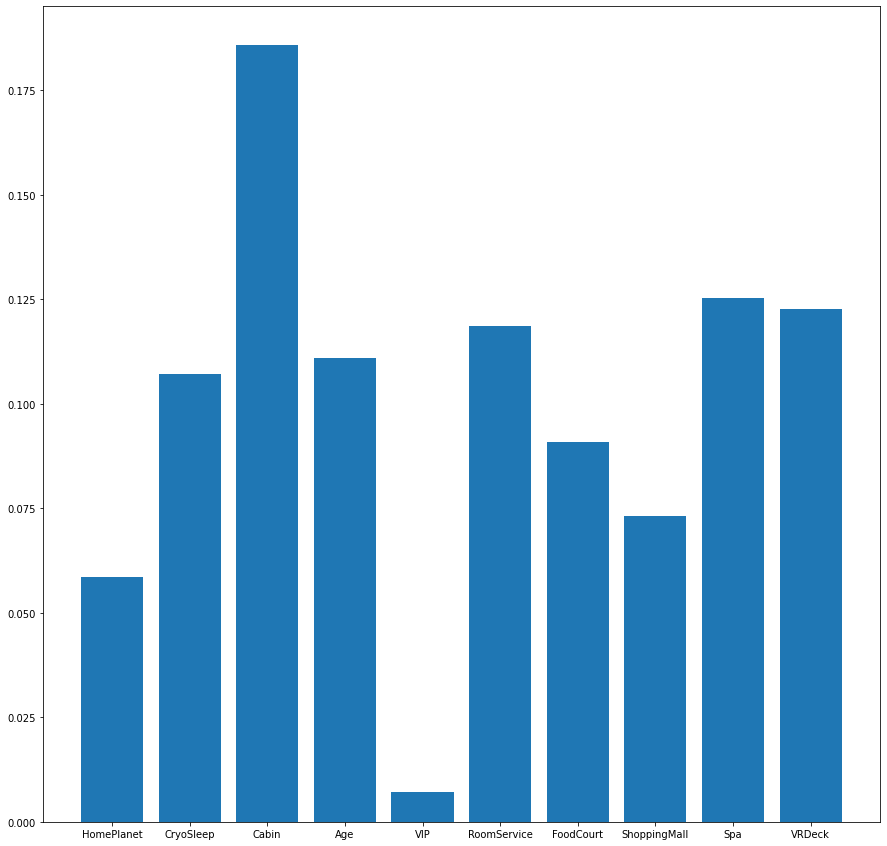

In [23]:
plt.figure(figsize=(15,15))
plt.bar(X_key,RandomForestClassifierModel.feature_importances_)

# Calculating Prediction

In [24]:
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for RandomForestClassifierModel is :  [0 0 0 0 1 0 0 0 0 1]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.85683053 0.14316947]
 [0.52712339 0.47287661]
 [0.97532345 0.02467655]
 [0.91556566 0.08443434]
 [0.34258926 0.65741074]
 [0.80637356 0.19362644]
 [0.86796831 0.13203169]
 [0.93703496 0.06296504]
 [0.79197351 0.20802649]
 [0.2483937  0.7516063 ]]


# Calculating Confusion Matrix

In [25]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[1035  262]
 [ 254 1057]]


# drawing confusion matrix

<AxesSubplot:>

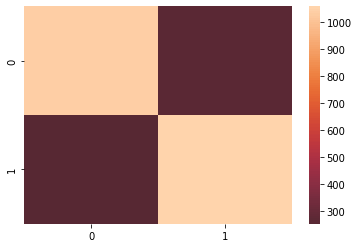

In [26]:
plt.figure()
sns.heatmap(CM, center = True)

# Calculating Confusion Matrix

In [27]:
CM = confusion_matrix(y_train,RandomForestClassifierModel.predict(X_train))
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[2756  262]
 [ 158 2909]]


# drawing confusion matrix

<AxesSubplot:>

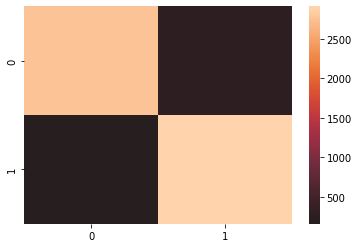

In [28]:
plt.figure()
sns.heatmap(CM, center = True)

# Calculating classification Report

In [29]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.80      0.80      0.80      1297
           1       0.80      0.81      0.80      1311

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [30]:
test_pred=RandomForestClassifierModel.predict(test_data)
pred=[]
for i in test_pred:
    if i==1:
        pred.append('True')
    else:
        pred.append('False')
submision=pd.DataFrame(pred,columns=['Transported'],index=index)
submision.to_csv('/kaggle/working/prediction.csv')
submision

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,False
0023_01,False
...,...
9266_02,True
9269_01,False
9271_01,True
